<a href="https://colab.research.google.com/github/durgak03/ML-Product-Manager/blob/main/Durga_Assignment3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# lets Altair plot bigger datesets greater than 5000 rows
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [ ]:
df_cars = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTvsbj2MqK98MuBSPGyhG6Lr8j7yFqviBNbUKWb9v6uVUq7QfS5UW9JRRc454T4IceRiLTeWCOEXAaE/pub?gid=1780054707&single=true&output=csv")

In [ ]:
df_cars.shape

(505, 13)

In [ ]:
df_cars.columns

Index(['Car Make', 'Car Model', 'Dealer or Individual?', 'Price', 'Year',
       'Location', 'Mileage', 'Doors', 'Color', 'VIN#', 'Engine',
       'Description', 'Web Link'],
      dtype='object')

In [ ]:
#summary stats for numeric columns
df_cars.describe()

,Price,Year,Mileage,Doors
count,505.000000,505.000000,504.000000,505.000000
mean,20867.849505,2016.807921,57949.232143,3.984158
std,7444.880657,4.050859,49337.709490,0.235168
min,27.000000,2008.000000,0.000000,2.000000
25%,15279.000000,2014.000000,22614.500000,4.000000
50%,21998.000000,2018.000000,41879.000000,4.000000
75%,26111.000000,2020.000000,84389.500000,4.000000
max,38907.000000,2022.000000,317325.000000,5.000000


In [ ]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car Make               505 non-null    object 
 1   Car Model              505 non-null    object 
 2   Dealer or Individual?  505 non-null    object 
 3   Price                  505 non-null    int64  
 4   Year                   505 non-null    int64  
 5   Location               365 non-null    object 
 6   Mileage                504 non-null    float64
 7   Doors                  505 non-null    int64  
 8   Color                  505 non-null    object 
 9   VIN#                   505 non-null    object 
 10  Engine                 505 non-null    object 
 11  Description            457 non-null    object 
 12  Web Link               505 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 51.4+ KB


In [ ]:
#dropping location as the data is not very useful and no longer needed for our correlation analysis
df_cars.drop(columns = ['Location'], inplace = True)

#dropping VIN as it's a unique value that will unaffect the correlation analysis
df_cars.drop(columns = ['VIN#'], inplace = True)

In [ ]:
df_cars.dropna(inplace = True)

In [ ]:
#checking if there is no null values again for one last time
#retainig other columns to check the correlation of them with price as (make, model and year)
df_cars.isna().sum()

Car Make                 0
Car Model                0
Dealer or Individual?    0
Price                    0
Year                     0
Mileage                  0
Doors                    0
Color                    0
Engine                   0
Description              0
Web Link                 0
dtype: int64

In [ ]:
corr = df_cars.corr()

<ipython-input-68-a1760804e3ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cars.corr()


In [ ]:
corr['Price']

Price      1.000000
Year       0.857271
Mileage   -0.696941
Doors      0.072471
Name: Price, dtype: float64

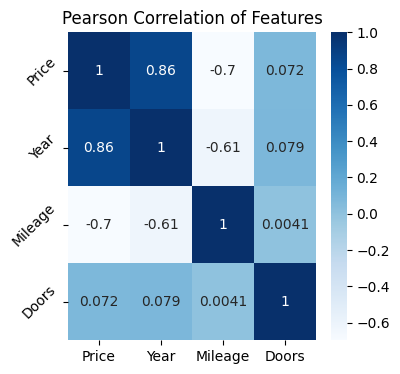

In [ ]:
#heatmap of correlations
f, ax = plt.subplots(figsize=(4, 4))

sns.heatmap(corr, cmap="Blues", annot=True, square=False, ax=ax)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=45);

In [ ]:
# len(df_cars['Location'].unique())

In [ ]:
X = df_cars[['Year','Mileage']]
y = df_cars['Price'].values.reshape(-1, 1)

In [ ]:
#Scatter plot to display cars based on Price vs Mileage
scatter = alt.Chart(df_cars).mark_circle().encode(
    alt.Y("Price"),
    alt.X("Mileage:Q")
).properties(width=1000, height = 300)
scatter

alt.Chart(...)

In [ ]:
# y.isnull().sum()

In [ ]:
print(X.shape)
print(y.shape)

(456, 2)
(456, 1)


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#importing scaler function
from sklearn.preprocessing import StandardScaler

#scaling the independent variables
scaler = StandardScaler()
scaler.fit(X)
scled_X = scaler.transform(X)

In [ ]:
#Bar chart to plot the price with the total count
alt.Chart(df_cars).mark_bar().encode(
    alt.X("Price", bin=True),
    alt.Y("count()")
)

alt.Chart(...)

In [ ]:
#source is from stackabuse, link given at the reflection (at last)
import random

#setting the seed
SEED  = random.seed(10)

In [ ]:
#splitting the data into train and test
#setting test data to 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [ ]:
#importing linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#fit training dataset to linear regressor
regressor.fit(X_train, y_train)

#predicting values on test dataset
y_pred = regressor.predict(X_test)

#comparing actual and predictive value on test dataset
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

    Actual     Predicted
0    17998  13716.122601
1     7900  11988.552515
2    16950  23305.527073
3    24590  18615.521169
4    24959  27392.455213
..     ...           ...
87   23983  23425.778887
88   22777  23166.804078
89   19995  14909.275792
90    8850   9703.173270
91   25691  23389.821324

[92 rows x 2 columns]


In [ ]:
#check for null values
# X_test.isnull().sum()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#calculating mean absolute error, root mean square error on test dataset
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 2068.83
Mean squared error: 6853177.05
Root mean squared error: 2617.86



**Reflection:**

**Note**: Few of source code has been retrived from [Class](https://) as well as [Stackabuse](https://)

1. I wanted to figure out the **correlation between Price over the columns.**
2. During the process, I realized **VIN# is unqiue to each car and will make no sense** to have it for finding correlation so dropped it.
3. **Location field was so complex and redundant** that it makes it not very useful for my analysis, so removed it.
4. **I made price, Year, Door as integer and Mileage as Float.**
5. I found the correlation that **Price affects - Year, Mileage, Doors sesibly.** There is no correlation with the dependant variable.
Below are the results.
Price      1.000000
Year       0.857271
Mileage   -0.696941
Doors      0.072471
Name: Price, dtype: float64
6. The correlation results are good enough because it means that:
- when Price is 1, Year is 85%
------- It is a good correlation as **increase in price increases year** as well.
- when Price is 1, Mileage is -69%
------- It is a good correlation as **increase in price decreases Mileage** as well.
- when Price is 1, Door is 7%
------- It is NOT a good correlation as **increase in price does not mean that the Door will and there is only slight correlation).**

7. **My prediction vlaues are good as they have a relatively lower scores for a large dataset of values of train and test models.**
Below are the results of MEA, MSE, RMSE.
MEA: Mean absolute error: 2068.83
MSE: Mean squared error: 6853177.05
Root mean squared error: 2617.86
